<style>
h1 {
  color: #0078d4
}
</style>
<h1>Classification algorithms
</h1>

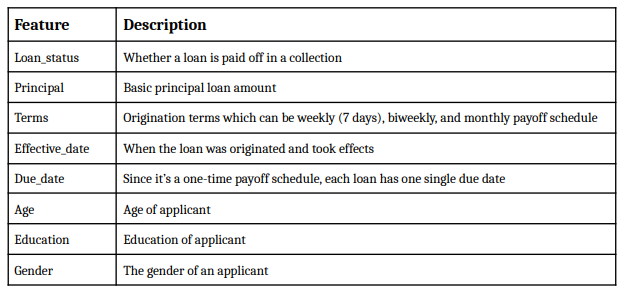



6. Future Predictions:
Based on the evaluation results, identify the most performant model. Use this model
to make predictions on future observations or unseen data and provide insights into
its practical application.

<style>
h3 {
 color: #0078d4
}
</style>
<h3>1. Dataset Preparation:
Load and preprocess the dataset. Ensure data is clean and ready for analysis,
handling any missing values, outliers, or data imbalances as necessary.</h3>

In [2044]:
import pandas as pd

In [2045]:
#Importing the dataset
df = pd.read_csv("loan_train.csv", sep=',')

In [2046]:
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [2047]:
#printing info about columns
#it shows column names, number of rows, data types and number of null values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [2048]:
#describe gives insight about data frame as  min and max, middle, and quartile values per column...
df.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


In [2049]:
#those colors will be used to display plots
colors = ["#19647E", "#FF6F61", '#B7C3F3', '#DD7596', '#8EB897', '#F9CDAD', '#F8AFA8', '#A8D0E6', '#8A5575', '#D8B56B']

In [2050]:
#droping one of 2 unnamed columns, second will be renamed as customer id as that must be in this case
df = df.drop(['Unnamed: 0.1'], axis=1).copy()
df = df.rename(columns={'Unnamed: 0': 'customer_id'}).copy()

In [2051]:
#renaming some values as they represent same thing
df= df.replace('High School or Below', 'Secondary or Below')
df= df.replace('Bechalor', 'Tertiary')
df= df.replace('college', 'Tertiary')
df= df.replace('Master or Above', 'Postgraduate')

In [2052]:
#displaying count of loean amount less than 750 and deleting outliers
print(df[df['Principal'] < 800].shape[0])
df = df.drop(df[df['Principal'] < 800].index)

5


In [2053]:
#printing all unique values for Principal coumn and deliting outliers
print(df['Principal'].value_counts())
df = df.drop(df[df['Principal'] == 900].index)

Principal
1000    258
800      81
900       2
Name: count, dtype: int64


In [2054]:
#displaying unique values for term and displaying how many data points each value has
#after that removing outliers
print(df['terms'].value_counts())
df = df.drop(df[df['terms'] == 7].index)

terms
30    184
15    146
7       9
Name: count, dtype: int64


Visualizing data

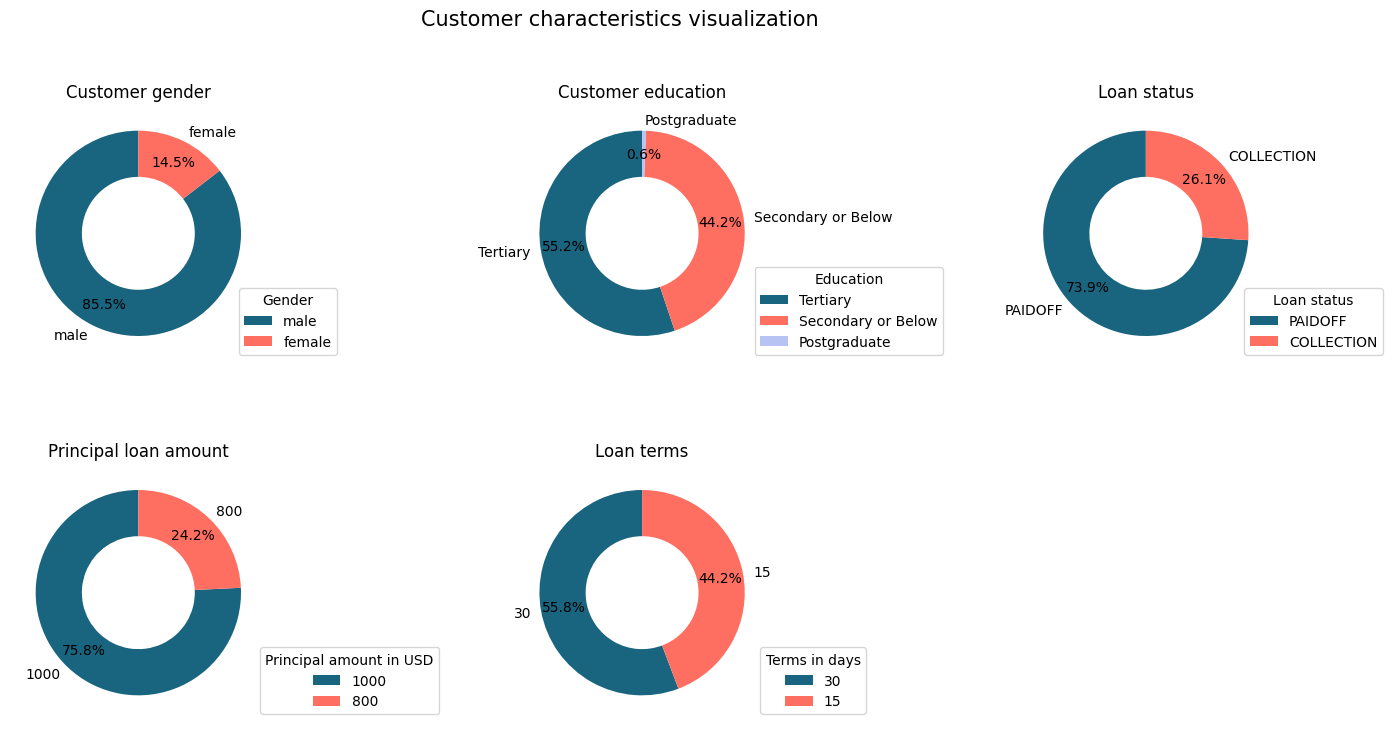

In [2055]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(18, 8))
axs = axs.flatten()

#plotting gender on pie chart
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
axs[0].pie(df['Gender'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
axs[0].set_title("Customer gender")
axs[0].legend(title="Gender", loc='lower right', bbox_to_anchor=(1.3, 0))

#plotting education
education_counts = df['education'].value_counts()
labels = education_counts.index
axs[1].pie(df['education'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
axs[1].set_title("Customer education")
axs[1].legend(title="Education", loc='lower right', bbox_to_anchor=(1.7, 0))

#ploting loan status
loan_status_counts = df['loan_status'].value_counts()
labels = loan_status_counts.index
axs[2].pie(df['loan_status'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
axs[2].set_title("Loan status")
axs[2].legend(title="Loan status", loc='lower right', bbox_to_anchor=(1.45, 0))

#plotting loan amount
principal_counts = df['Principal'].value_counts()
labels = principal_counts.index
axs[3].pie(df['Principal'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
axs[3].set_title("Principal loan amount")
axs[3].legend(title="Principal amount in USD", loc='lower right', bbox_to_anchor=(1.7, 0))

#plotting loan terms
terms_counts = df['terms'].value_counts()
labels = terms_counts.index
axs[4].pie(df['terms'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
axs[4].set_title("Loan terms")
axs[4].legend(title="Terms in days", loc='lower right', bbox_to_anchor=(1.4, 0))

axs[5].axis('off')

plt.suptitle("Customer characteristics visualization", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


In [2056]:
#displaying age count for age over 45 and less than 21 and droping them as they are outliers
print(df[df['age'] > 45].shape[0])
print(df[df['age'] < 21].shape[0])

df = df.drop(df[df['age'] > 45].index)
df = df.drop(df[df['age'] < 20].index)

7
6


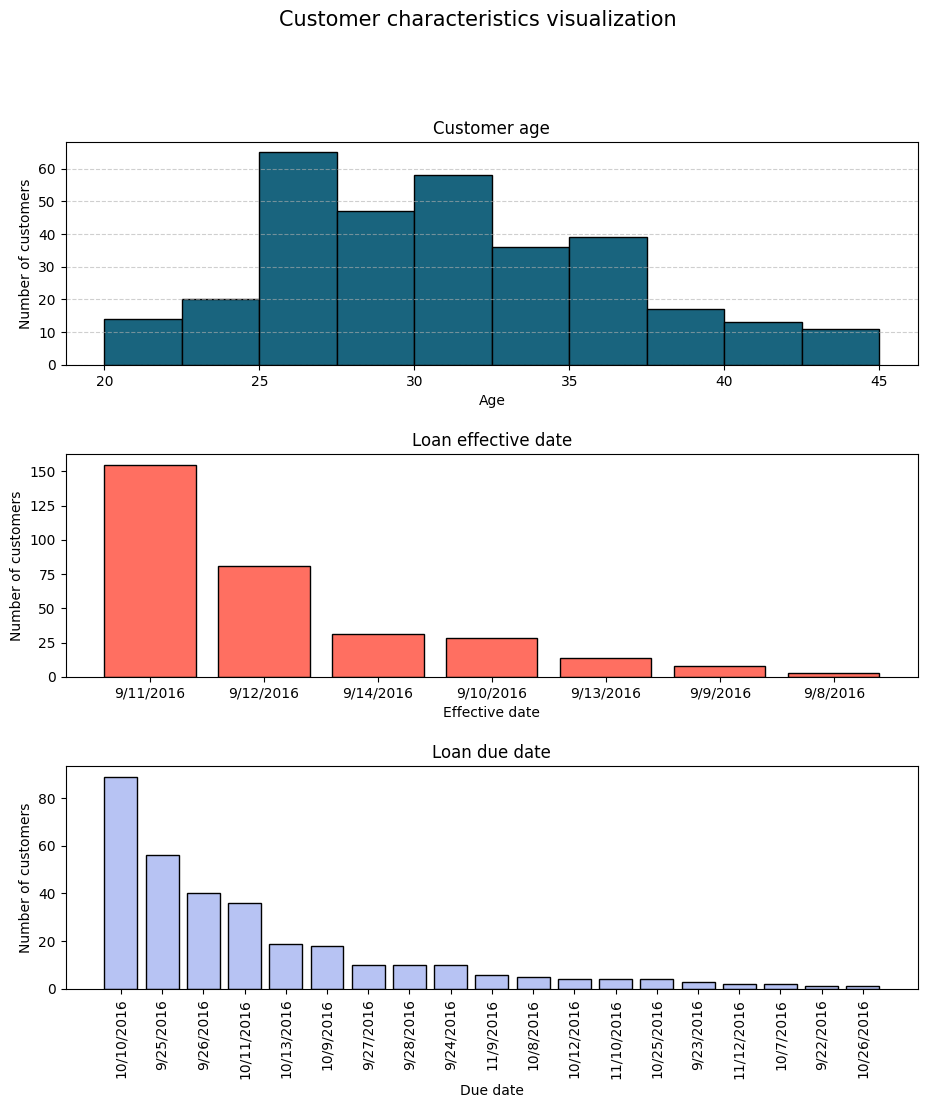

In [2057]:
#plotting other customer caracteristics that are not suitable to be shown on a pie chart
fig, axs = plt.subplots(3, 1, figsize=(11, 11))
axs = axs.flatten()

#plotting age on histogram
axs[0].hist(df['age'], bins=10, color=colors[0], edgecolor='black')
axs[0].set_title("Customer age")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Number of customers")
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

#plotting effective date on bar chart
axs[1].bar(df['effective_date'].value_counts().index, df['effective_date'].value_counts().values, color=colors[1], edgecolor='black')
axs[1].set_title("Loan effective date")
axs[1].set_xlabel("Effective date")
axs[1].set_ylabel("Number of customers")

#plotting due date on bar chart
axs[2].bar(df['due_date'].value_counts().index, df['due_date'].value_counts().values, color=colors[2], edgecolor='black')
axs[2].set_xticks(df['due_date'].value_counts().index)
axs[2].set_xticklabels(df['due_date'].value_counts().index, rotation=90)
axs[2].set_title("Loan due date")
axs[2].set_xlabel("Due date")
axs[2].set_ylabel("Number of customers")

plt.suptitle("Customer characteristics visualization", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

<b>The feature that will be classified is loan status (paid (PAIDOFF), unpaid (COLLECTION))</b>


<style>
    b {
        color: #d40047
    }
</style>
<b>Preprocesing data for classification</b>

<b>Test/train data split </b>

In [2058]:
#a copy of a data set will be made, as i want to preserve the original data set
df_encoded = df.copy()

Converting dates (effective and due dates) to loan duration and removing those 2 columns

In [2059]:
#first effective dates and due dates will be converted to data time format
df_encoded['effective_date'] = pd.to_datetime(df_encoded['effective_date'])
df_encoded['due_date'] = pd.to_datetime(df_encoded['due_date'])

#adding new column loan duration, that is result of subtraction of loan effective and loan due date
df_encoded['loan_duration'] = (df_encoded['due_date'] - df_encoded['effective_date']).dt.days

In [2060]:
#removing columns loan due date and effective date as they wont be necessary
df_encoded = df_encoded.drop(['effective_date', 'due_date'], axis=1).copy()

<b>Encoding categorical values </b>

Column loan_status won't be encoded in order to avoid data leakage

In [2061]:
#encoding gender, male will be replaced with 0, female with 1
df_encoded['Gender']= df_encoded['Gender'].map({'male': 0, 'female': 1})

In [2062]:
#one hot encoding for column education, for each value, it will be created a new column
df_encoded = pd.get_dummies(df_encoded, columns=['education'])

#each of those columns will be converted to 1 and 0, 1 for true and 0 for false
df_encoded['education_Postgraduate'] = df_encoded['education_Postgraduate'].astype(int)
df_encoded['education_Secondary or Below'] = df_encoded['education_Secondary or Below'].astype(int)
df_encoded['education_Tertiary'] = df_encoded['education_Tertiary'].astype(int)

In [2063]:
df_encoded.head()

,customer_id,loan_status,Principal,terms,age,Gender,loan_duration,education_Postgraduate,education_Secondary or Below,education_Tertiary
0,0,PAIDOFF,1000,30,45,0,29,0,1,0
1,2,PAIDOFF,1000,30,33,1,29,0,0,1
2,3,PAIDOFF,1000,15,27,0,14,0,0,1
3,4,PAIDOFF,1000,30,28,1,29,0,0,1
4,6,PAIDOFF,1000,30,29,0,29,0,0,1


<b>Splitting data into test/ train data</b>

In [2064]:
from sklearn.model_selection import train_test_split

#split data into train and test set, x is input, y is output; loan status will be dropped from x as it is output, customer id is not relevant
x = df_encoded.drop(['loan_status', 'customer_id'], axis=1)
y = df_encoded['loan_status']

#split data into 80%-20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

<b>Data normalization</b>

In [2065]:
from sklearn.preprocessing import StandardScaler

#using standard scale to scale data
#scaling only input data to avoid data leakage
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<style>
h3 {
 color: #0078d4
}
</style>
<h3>2. Classification Algorithms:
Implement four different classification algorithms of your choice (e.g., Logistic
Regression, K-Nearest Neighbors, Decision Tree, and Support Vector Machine, etc.).</h3>

<style>
    h3 {
        color: #0078d4
    }
</style>
<h3>3. Performance Evaluation:
Evaluate the performance of each classification algorithm using relevant metrics,
such as the confusion matrix, accuracy, precision, recall, F1-score, and a detailed
classification report. Discuss the results.</h3>

<style>
    h4 {
        color: #00d47c
    }
</style>
<h4>Clasification algorithm 1: Logic regression</h4>

In [2066]:
from sklearn.linear_model import LogisticRegression

#building a model for classification
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [2067]:
#predicting output for test data
y_pred = model.predict(x_test)

<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Accuracy</h4>

In [2068]:
from sklearn.metrics import accuracy_score

accuracy_log_regr = accuracy_score(y_test, y_pred)
accuracy_log_regr_percentage = accuracy_log_regr * 100
print(f"Accuracy lin. regression: {accuracy_log_regr_percentage:.2f}%")

Accuracy lin. regression: 78.12%


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Confusion Matrix</h4>

| True Negative | False Positive| <br>
| False Negative| True Positive |

In [2069]:
from sklearn.metrics import confusion_matrix

#showing confusion matrix
conf_matrix_log_regr = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_matrix_log_regr)

Confusion matrix:
[[ 0 12]
 [ 2 50]]


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Precision</h4>
Ratio of correctly predicted positives to total positives

In [2070]:
from sklearn.metrics import precision_score

#calculating precision
precision_log_regr = precision_score(y_test, y_pred, pos_label='PAIDOFF')
print(f"Precision: {precision_log_regr:.2f}")

Precision: 0.81


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Recall</h4>
Measures ratio of all predicted positives to all actual positives

In [2071]:
from sklearn.metrics import recall_score

#calculation recall
recall_log_regr = recall_score(y_test, y_pred, pos_label='PAIDOFF')
print(f"Recall: {recall_log_regr:.2f}")


Recall: 0.96


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>F1-Score</h4>
It shows weighted average of precision and recall

In [2072]:
from sklearn.metrics import f1_score

#calculating f1 score
f1_log_reg = f1_score(y_test, y_pred, pos_label='PAIDOFF')
print(f"F1-Score: {f1_log_reg:.2f}")

F1-Score: 0.88


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Classification report</h4>

In [2073]:
from sklearn.metrics import classification_report

class_report_log_regr = classification_report(y_test, y_pred)
print(class_report_log_regr)

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        12
     PAIDOFF       0.81      0.96      0.88        52

    accuracy                           0.78        64
   macro avg       0.40      0.48      0.44        64
weighted avg       0.66      0.78      0.71        64



<style>
    h4 {
        color: #00d47c
    }
</style>
<h4>Classification algorithm 2: K-Nearest Neighbors</h4>

Using greed search to get best k-value

In [2074]:
from sklearn.neighbors import KNeighborsClassifier

#initializing knn model with value 5 for k
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

Training the model

In [2075]:
#making predictions
y_pred_knn = knn.predict(x_test)

<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Accuracy</h4>

In [2076]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn_percentage = accuracy_knn * 100
print(f"Accuracy lin. regression: {accuracy_knn_percentage:.2f}%")

Accuracy lin. regression: 67.19%


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Confusion Matrix</h4>

| True Negative | False Positive| <br>
| False Negative| True Positive |

In [2077]:
#showing confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion matrix:")
print(conf_matrix_knn)

Confusion matrix:
[[ 0 12]
 [ 9 43]]


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Precision</h4>
Ratio of correctly predicted positives to total positives

In [2078]:
#calculating precision
precision_knn = precision_score(y_test, y_pred_knn, pos_label='PAIDOFF')
print(f"Precision: {precision_knn:.2f}")

Precision: 0.78


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Recall</h4>
Measures ratio of all predicted positives to all actual positives

In [2079]:
#calculation recall
recall_knn = recall_score(y_test, y_pred_knn, pos_label='PAIDOFF')
print(f"Recall: {recall_knn:.2f}")

Recall: 0.83


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>F1-Score</h4>
It shows weighted average of precision and recall

In [2080]:
#calculating f1 score
f1_kmm = f1_score(y_test, y_pred_knn, pos_label='PAIDOFF')
print(f"F1-Score: {f1_kmm:.2f}")

F1-Score: 0.80


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Classification report</h4>

In [2081]:
from sklearn.metrics import classification_report
class_report_knn = classification_report(y_test, y_pred_knn, zero_division=0)
print(class_report_knn)


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        12
     PAIDOFF       0.78      0.83      0.80        52

    accuracy                           0.67        64
   macro avg       0.39      0.41      0.40        64
weighted avg       0.64      0.67      0.65        64



<style>
    h4 {
        color: #00d47c
    }
</style>
<h4>Classification algorithm 3: Decision Tree</h4>

Using greed search to get best parameters and training the tree

In [2082]:
from sklearn.tree import DecisionTreeClassifier

#initilizing the model
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

#making predictions
y_pred_dt = tree.predict(x_test)

<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Accuracy</h4>

In [ ]:
#accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt_percentage = accuracy_dt * 100
print(f"Accuracy dt.: {accuracy_dt_percentage:.2f}%")

Accuracy dt.: 60.94%


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Confusion Matrix</h4>

| True Negative | False Positive| <br>
| False Negative| True Positive |

In [2084]:
#showing confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion matrix:")
print(conf_matrix_dt)

Confusion matrix:
[[ 1 11]
 [14 38]]


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Precision</h4>
Ratio of correctly predicted positives to total positives

In [2085]:
#calculating precision
precision_dt = precision_score(y_test, y_pred_dt, pos_label='PAIDOFF')
print(f"Precision: {precision_dt:.2f}")

Precision: 0.78


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Recall</h4>
Measures ratio of all predicted positives to all actual positives

In [2086]:
#calculation recall
recall_dt = recall_score(y_test, y_pred_dt, pos_label='PAIDOFF')
print(f"Recall: {recall_dt:.2f}")

Recall: 0.73


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>F1-Score</h4>
It shows weighted average of precision and recall

In [2087]:
#calculating f1 score
f1_dt = f1_score(y_test, y_pred_dt, pos_label='PAIDOFF')
print(f"F1-Score: {f1_dt:.2f}")

F1-Score: 0.75


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Classification report</h4>

In [2088]:
class_report_dt = classification_report(y_test, y_pred_dt, zero_division=0)
print(class_report_dt)

              precision    recall  f1-score   support

  COLLECTION       0.07      0.08      0.07        12
     PAIDOFF       0.78      0.73      0.75        52

    accuracy                           0.61        64
   macro avg       0.42      0.41      0.41        64
weighted avg       0.64      0.61      0.63        64



<style>
    h4 {
        color: #00d47c
    }
</style>
<h4>Classification algorithm 4: Support Vector Machine</h4>

In [2089]:
from sklearn.svm import SVC

#initilizing the mddeel
svc = SVC()
svc.fit(x_train, y_train)

#making predictions
y_pred_svm = svc.predict(x_test)


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Accuracy</h4>

In [2090]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm_percentage = accuracy_svm * 100
print(f"Accuracy svc: {accuracy_svm_percentage:.2f}%")

Accuracy svc: 78.12%


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Confusion Matrix</h4>

| True Negative | False Positive| <br>
| False Negative| True Positive |

In [2091]:
#showing confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion matrix:")
print(conf_matrix_svm)

Confusion matrix:
[[ 0 12]
 [ 2 50]]


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Precision</h4>
Ratio of correctly predicted positives to total positives

In [2092]:
#calculating precision
precision_svm = precision_score(y_test, y_pred_svm, pos_label='PAIDOFF')
print(f"Precision: {precision_svm:.2f}")

Precision: 0.81


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Recall</h4>
Measures ratio of all predicted positives to all actual positives

In [2093]:
#calculation recall
recall_svm = recall_score(y_test, y_pred_svm, pos_label='PAIDOFF')
print(f"Recall: {recall_svm:.2f}")

Recall: 0.96


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>F1-Score</h4>
It shows weighted average of precision and recall

In [2094]:
#calculating f1 score
f1_svm = f1_score(y_test, y_pred_svm, pos_label='PAIDOFF')
print(f"F1-Score: {f1_svm:.2f}")

F1-Score: 0.88


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Classification report</h4>

In [2095]:
class_report_svm = classification_report(y_test, y_pred_svm, zero_division=0)
print(class_report_svm)

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        12
     PAIDOFF       0.81      0.96      0.88        52

    accuracy                           0.78        64
   macro avg       0.40      0.48      0.44        64
weighted avg       0.66      0.78      0.71        64



<style>
    h3 {
        color: #0078d4
    }
</style>
<h3>3. Performance Evaluation:
Evaluate the performance of each classification algorithm using relevant metrics,
such as the confusion matrix, accuracy, precision, recall, F1-score, and a detailed
classification report. Discuss the results.</h3>

In [2096]:
metrics = pd.DataFrame({
    'Model': ['Logistic regression', 'KNN', 'Decision tree', 'SVM'],
    'Accuracy in %': [accuracy_log_regr_percentage, accuracy_knn_percentage, accuracy_dt_percentage, accuracy_svm_percentage],
    'Precision': [precision_log_regr, precision_knn, precision_dt, precision_svm],
    'Recall': [recall_log_regr, recall_knn, recall_dt, recall_svm],
    'F1-Score': [f1_log_reg, f1_kmm, f1_dt, f1_svm]
})

metrics.head()

,Model,Accuracy in %,Precision,Recall,F1-Score
0,Logistic regression,78.1250,0.806452,0.961538,0.877193
1,KNN,67.1875,0.781818,0.826923,0.803738
2,Decision tree,60.9375,0.775510,0.730769,0.752475
3,SVM,78.1250,0.806452,0.961538,0.877193


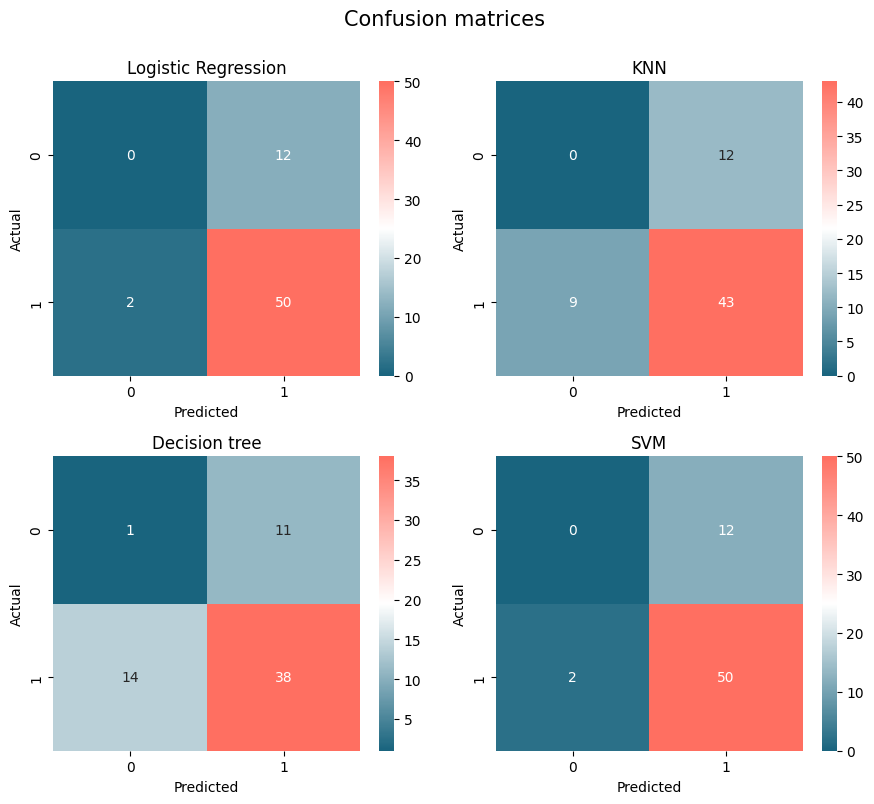

In [2097]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
 #colors that i will be using
my_colors = ['#19647E', '#FFFFFF', '#FF6F61']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", my_colors)

#adding confusion matrices to the array and their names
conf_matrices = [conf_matrix_log_regr, conf_matrix_knn, conf_matrix_dt, conf_matrix_svm]
titles = ['Logistic Regression', 'KNN', 'Decision tree', 'SVM']

fig, axes = plt.subplots(2, 2, figsize=(9, 8))

#looping and showing data
for i, ax in enumerate(axes.ravel()):
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap=custom_cmap, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.suptitle("Confusion matrices", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.3, wspace=0.6) #adjusting space between plots
plt.tight_layout()
plt.show()

<ul>
    <b> Conclusion</b>
    <li>All models are fairly accurate, with decision tree being  less accurate than others, and logistic regression and SVM being most accurate</li>
    <li>All four models are very good to predict positives (loan status is PAIDOFF), but are very bad at predicting negatives. </li>
    <li>Decision tree is little worse to predict positives, while logistic regression and SVM are vry good</li>
</ul>

<b>OBS. Detailed classification report if located under each clustering methods!</b>

<style>
    h3 {
        color: #0078d4
    }
</style>
<h3>4. Hyperparameter Tuning:
    Use GridSearchCV to perform hyperparameter tuning for each algorithm. Compare
    the performance of the optimized models with the initial results from Question 3
    using the same metrics.
</h3>


<style>
    h4 {
        color: #00d47c
    }
</style>
<h4>Logic regression</h4>

In [ ]:
from sklearn.model_selection import GridSearchCV

#defining number of interations
model = LogisticRegression(max_iter=2000)

#parameters for grid bearch
param_grid = {
    'C': [0.1, 0.2, 0.3, 0.5, 1, 10, 20],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

#initializing grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

#fitting model
grid_search.fit(x_train, y_train)

#best parameters
best_params = grid_search.best_params_
print("Best params: ", best_params)

#using the best model and making predictions
model = grid_search.best_estimator_
y_pred = model.predict(x_test)

Best params:  {'C': 0.1, 'solver': 'newton-cg'}


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Accuracy</h4>

In [2099]:
#accuracy
accuracy_lin_reg_greed_search = accuracy_score(y_test, y_pred)
accuracy_lin_reg_greed_search_percentage = accuracy_lin_reg_greed_search * 100
print(f"Accuracy lin. regression: {accuracy_lin_reg_greed_search_percentage:.2f}%")

Accuracy lin. regression: 79.69%


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Confusion Matrix</h4>

| True Negative | False Positive| <br>
| False Negative| True Positive |

In [2100]:
#confusion matrix
conf_matrix_log_regr_greed_search = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_matrix_log_regr_greed_search)

Confusion matrix:
[[ 0 12]
 [ 1 51]]


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Precision</h4>
Ratio of correctly predicted positives to total positives

In [2101]:
#precision
precision_log_regr_greed_search = precision_score(y_test, y_pred, pos_label='PAIDOFF')
print(f"Precision: {precision_log_regr_greed_search:.2f}")

Precision: 0.81


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Recall</h4>
Measures ratio of all predicted positives to all actual positives

In [2102]:
#recall
recall_log_regr_greed_search = recall_score(y_test, y_pred, pos_label='PAIDOFF')
print(f"Recall: {recall_log_regr_greed_search:.2f}")

Recall: 0.98


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>F1-Score</h4>
It shows weighted average of precision and recall

In [2103]:
#f1 score
f1_log_reg_greed_search = f1_score(y_test, y_pred, pos_label='PAIDOFF')
print(f"F1-Score: {f1_log_reg_greed_search:.2f}")

F1-Score: 0.89


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Classification report</h4>

In [2104]:
#classification report
class_report_log_regr_greed_search = classification_report(y_test, y_pred)
print(class_report_log_regr_greed_search)

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        12
     PAIDOFF       0.81      0.98      0.89        52

    accuracy                           0.80        64
   macro avg       0.40      0.49      0.44        64
weighted avg       0.66      0.80      0.72        64



<style>
    h4 {
        color: #00d47c
    }
</style>
<h4>K-Nearest Neighbors</h4>

In [2105]:
#parameters that will be tested
k_values = {'n_neighbors': range(1, 30)}

#defining greed search
grid_search = GridSearchCV(KNeighborsClassifier(), k_values, cv=10, scoring='accuracy') #cv is cross validation
#fitting it with my data
grid_search.fit(x_train, y_train)
#getting best value of k
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

Best k: 25


In [2106]:
#initializing knn model with best k value and training it
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)

#making predictions
y_pred_knn = knn.predict(x_test)

<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Accuracy</h4>

In [2107]:
#accuracy
accuracy_knn_greed_search = accuracy_score(y_test, y_pred_knn)
accuracy_knn_greed_search_percentage = accuracy_knn_greed_search * 100
print(f"Accuracy lin. regression: {accuracy_knn_greed_search_percentage:.2f}%")

Accuracy lin. regression: 81.25%


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Confusion Matrix</h4>

| True Negative | False Positive| <br>
| False Negative| True Positive |

In [2108]:
#confusion matrix
conf_matrix_knn_greed_search = confusion_matrix(y_test, y_pred_knn)
print("Confusion matrix:")
print(conf_matrix_knn_greed_search)

Confusion matrix:
[[ 0 12]
 [ 0 52]]


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Precision</h4>
Ratio of correctly predicted positives to total positives

In [2109]:
#precision
precision_knn_greed_search = precision_score(y_test, y_pred_knn, pos_label='PAIDOFF')
print(f"Precision: {precision_knn_greed_search:.2f}")

Precision: 0.81


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Recall</h4>
Measures ratio of all predicted positives to all actual positives

In [2110]:
#recall
recall_knn_greed_search = recall_score(y_test, y_pred_knn, pos_label='PAIDOFF')
print(f"Recall: {recall_knn_greed_search:.2f}")

Recall: 1.00


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>F1-Score</h4>
It shows weighted average of precision and recall

In [2111]:
#f1 score
f1_kmm_greed_search = f1_score(y_test, y_pred_knn, pos_label='PAIDOFF')
print(f"F1-Score: {f1_kmm_greed_search:.2f}")

F1-Score: 0.90


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Classification report</h4>

In [2112]:
#classification report
class_report_knn_greed_search = classification_report(y_test, y_pred_knn, zero_division=0)
print(class_report_knn_greed_search)

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        12
     PAIDOFF       0.81      1.00      0.90        52

    accuracy                           0.81        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.66      0.81      0.73        64



<style>
    h4 {
        color: #00d47c
    }
</style>
<h4>Decision Tree</h4>

In [2113]:
#values that will be tested foe parameters in decision tree
param_dt = {
    'max_depth': [2,3, 4, 5, 7, 10, 12,14],
    'min_samples_split': [2, 3, 4, 5, 7, 10, 12, 14],
    'min_samples_leaf': [1, 2, 3, 4,5 ,7, 10]
}

#initialing dt
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dt, cv=5, scoring='accuracy') #sv- cross validation

#fitting it with data
grid_search_dt.fit(x_train, y_train)

#getting the best parameters
print("Best param. dt: ", grid_search_dt.best_params_)

#using the best model and making predictions
dt_model = grid_search_dt.best_estimator_
y_pred_dt = dt_model.predict(x_test)


Best param. dt:  {'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}


C:\Users\mird\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Accuracy</h4>

In [2114]:
#acuracy
accuracy_dt_greed_search = accuracy_score(y_test, y_pred_dt)
accuracy_dt_greed_search_percentage = accuracy_dt_greed_search * 100
print(f"Accuracy dt.: {accuracy_dt_greed_search_percentage:.2f}%")

Accuracy dt.: 81.25%


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Confusion Matrix</h4>

| True Negative | False Positive| <br>
| False Negative| True Positive |

In [2115]:
#confusion matrix
conf_matrix_dt_greed_search = confusion_matrix(y_test, y_pred_dt)
print("Confusion matrix:")
print(conf_matrix_dt_greed_search)

Confusion matrix:
[[ 0 12]
 [ 0 52]]


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Precision</h4>
Ratio of correctly predicted positives to total positives

In [2116]:
#precision
precision_dt_greed_search = precision_score(y_test, y_pred_dt, pos_label='PAIDOFF')
print(f"Precision: {precision_dt_greed_search:.2f}")

Precision: 0.81


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Recall</h4>
Measures ratio of all predicted positives to all actual positives

In [2117]:
#recall
recall_dt_greed_search = recall_score(y_test, y_pred_dt, pos_label='PAIDOFF')
print(f"Recall: {recall_dt_greed_search:.2f}")

Recall: 1.00


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>F1-Score</h4>
It shows weighted average of precision and recall

In [2118]:
#f1 score
f1_dt_greed_search = f1_score(y_test, y_pred_dt, pos_label='PAIDOFF')
print(f"F1 score: {f1_dt_greed_search:.2f}")

F1 score: 0.90


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Classification report</h4>

In [2119]:
#classification report
class_report_dt_greed_search = classification_report(y_test, y_pred_dt, zero_division=0)
print(class_report_dt_greed_search)

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        12
     PAIDOFF       0.81      1.00      0.90        52

    accuracy                           0.81        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.66      0.81      0.73        64



<style>
    h4 {
        color: #00d47c
    }
</style>
<h4>Support Vector Machine</h4>

In [2120]:
param_svm = {
    'C': [0.1, 0.2, 0.3, 0.5, 1, 10, 20], #penalty for wrong classification
    'kernel': ['linear', 'rbf', 'poly'],  #karnel types are used to determinate separation line
    'gamma': ['scale', 'auto']  #it is used to determine how much each point influence on separation line
}

#initializing grid search in order to identify best parameters
grid_search_svm = GridSearchCV(SVC(random_state=42), param_svm, cv=5, scoring='accuracy')

#fitting model
grid_search_svm.fit(x_train, y_train)

#getting best parameters
print("Best param. for svm: ", grid_search_svm.best_params_)

#using the best model and making predictions
svm_model = grid_search_svm.best_estimator_
y_pred_svm = svm_model.predict(x_test)

Best param. for svm:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Accuracy</h4>

In [2121]:
#accuracy
accuracy_svm_greed_search = accuracy_score(y_test, y_pred_svm)
accuracy_svm_greed_search_percentage = accuracy_svm_greed_search * 100
print(f"Accuracy svm: {accuracy_svm_greed_search_percentage:.2f}%")

Accuracy svm: 81.25%


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Confusion Matrix</h4>

| True Negative | False Positive| <br>
| False Negative| True Positive |

In [2122]:
#confusion matrix
conf_matrix_svm_greed_search = confusion_matrix(y_test, y_pred_svm)
print("Confusion matrix:")
print(conf_matrix_svm_greed_search)

Confusion matrix:
[[ 0 12]
 [ 0 52]]


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Precision</h4>
Ratio of correctly predicted positives to total positives

In [2123]:
#precision
precision_svm_greed_search = precision_score(y_test, y_pred_svm, pos_label='PAIDOFF')
print(f"Precision: {precision_svm_greed_search:.2f}")

Precision: 0.81


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Recall</h4>
Measures ratio of all predicted positives to all actual positives

In [2124]:
#recall
recall_svm_greed_search = recall_score(y_test, y_pred_svm, pos_label='PAIDOFF')
print(f"Recall: {recall_svm_greed_search:.2f}")

Recall: 1.00


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>F1-Score</h4>
It shows weighted average of precision and recall

In [2125]:
#f1 score
f1_svm_greed_search = f1_score(y_test, y_pred_svm, pos_label='PAIDOFF')
print(f"F1 score: {f1_svm_greed_search:.2f}")

F1 score: 0.90


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Classification report</h4>

In [2126]:
#classification report
class_report_svm_greed_search = classification_report(y_test, y_pred_svm, zero_division=0)
print(class_report_svm_greed_search)

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        12
     PAIDOFF       0.81      1.00      0.90        52

    accuracy                           0.81        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.66      0.81      0.73        64



<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Performance comparison after using greed search</h4>

In [2127]:
metrics_2 = pd.DataFrame({
    'Model': ['Logistic regression', 'Logistic regression GS', 'KNN', 'KNN GS', 'Decision tree', 'Decision tree GS', 'SVM', 'SVM GS'],
    'Accuracy': [accuracy_log_regr, accuracy_lin_reg_greed_search, accuracy_knn, accuracy_knn_greed_search, accuracy_dt, accuracy_dt_greed_search, accuracy_svm, accuracy_svm_greed_search],
    'Precision': [precision_log_regr, precision_log_regr_greed_search, precision_knn, precision_knn_greed_search, precision_dt, precision_dt_greed_search, precision_svm, precision_svm_greed_search],
    'Recall': [recall_log_regr, recall_log_regr_greed_search, recall_knn, recall_knn_greed_search, recall_dt, recall_dt_greed_search, recall_svm, recall_svm_greed_search],
    'F1-Score': [f1_log_reg, f1_log_reg_greed_search, f1_kmm, f1_kmm_greed_search, f1_dt, f1_dt_greed_search, f1_svm, f1_svm_greed_search]
})

metrics_2.head(8)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic regression,0.781250,0.806452,0.961538,0.877193
1,Logistic regression GS,0.796875,0.809524,0.980769,0.886957
2,KNN,0.671875,0.781818,0.826923,0.803738
3,KNN GS,0.812500,0.812500,1.000000,0.896552
4,Decision tree,0.609375,0.775510,0.730769,0.752475
5,Decision tree GS,0.812500,0.812500,1.000000,0.896552
6,SVM,0.781250,0.806452,0.961538,0.877193
7,SVM GS,0.812500,0.812500,1.000000,0.896552


In [2128]:
metrics_2 = pd.DataFrame({
    'metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic regression': [accuracy_log_regr, precision_log_regr, recall_log_regr, f1_log_reg],
    'Logistic regression GS': [accuracy_lin_reg_greed_search, precision_log_regr_greed_search, recall_log_regr_greed_search, f1_log_reg_greed_search],
    'KNN': [accuracy_knn, precision_knn, recall_knn, f1_kmm],
    'KNN GS': [accuracy_knn_greed_search, precision_knn_greed_search, recall_knn_greed_search, f1_kmm_greed_search],
    'Decision tree': [accuracy_dt, precision_dt, recall_dt, f1_dt],
    'Decision tree GS': [accuracy_dt_greed_search, precision_dt_greed_search, recall_dt_greed_search, f1_dt_greed_search],
    'SVM': [accuracy_svm, precision_svm, recall_svm, f1_svm],
    'SVM GS': [accuracy_svm_greed_search, precision_svm_greed_search, recall_svm_greed_search, f1_svm_greed_search]
})

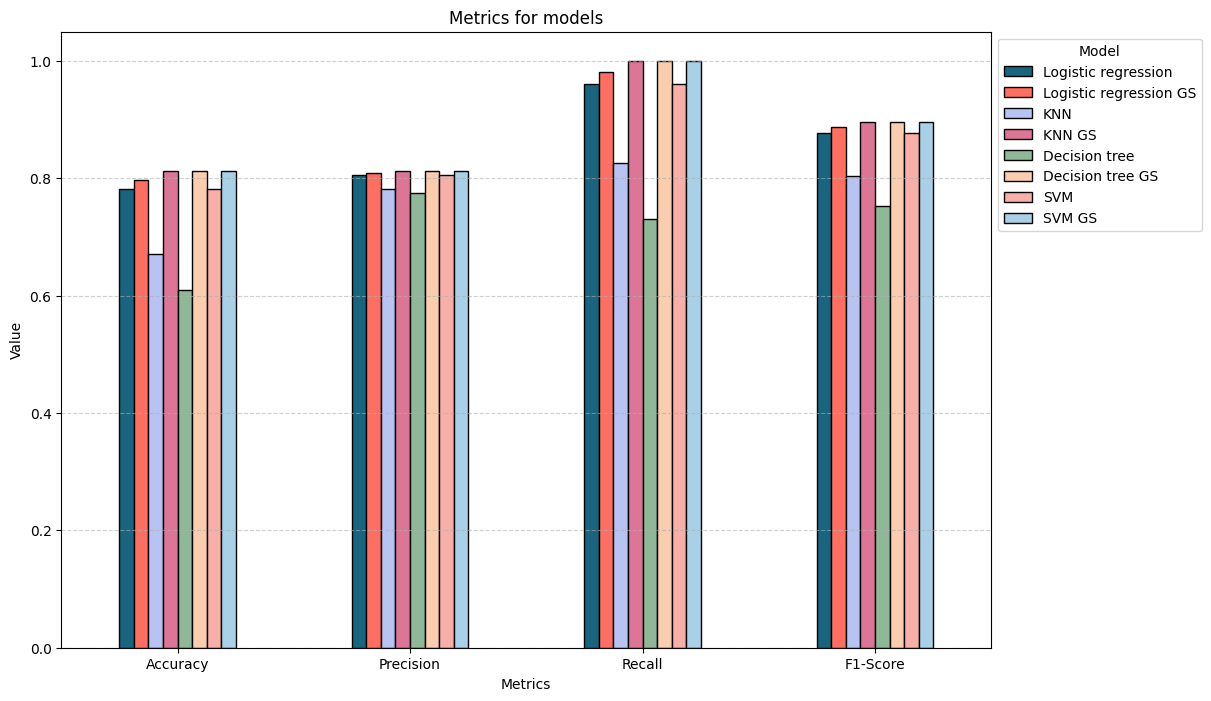

In [2131]:
#ploting metrics on grouped bar chart
metrics_2.plot(x='metrics', kind='bar', figsize=(12, 8), color=colors, edgecolor='black')
plt.title("Metrics for models")
plt.ylabel("Value")
plt.xlabel("Metrics")
plt.xticks(rotation=0)
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<style>
    h3 {
        color: #0078d4
    }
</style>
<h3>5. Ensemble Learning:
    Train a Decision Tree Classifier using the bagging technique. Compare its
    performance with that of a Random Forest Classifier, focusing on their strengths and
    weaknesses.</h3>

<style>
    h4 {
        color: #00d47c
    }
</style>
<h4>Decision Tree Classifier using the bagging technique</h4>



In [2134]:
#decission tree using bagging teqqnique
from sklearn.ensemble import BaggingClassifier

#initializing the model
#500 trees will be used, each tree will be trained on 100 samples
#bootstrap true means that each tree will be train on different samples
#n_jobs=-1 means that all processors will be used
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bagging.fit(x_train, y_train)

#making predictions
y_pred_bagging = bagging.predict(x_test)

<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Accuracy</h4>

In [2135]:
#accuracy
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_bagging_percentage = accuracy_bagging * 100
print(f"Accuracy bagging: {accuracy_bagging_percentage:.2f}%")

Accuracy bagging: 62.50%


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Confusion Matrix</h4>

| True Negative | False Positive| <br>
| False Negative| True Positive |

In [2136]:
#confusion matrix
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
print("Confusion matrix:")
print(conf_matrix_bagging)

Confusion matrix:
[[ 0 12]
 [12 40]]


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Precision</h4>
Ratio of correctly predicted positives to total positives

In [2137]:
#precision
precision_bagging = precision_score(y_test, y_pred_bagging, pos_label='PAIDOFF')
print(f"Precision: {precision_bagging:.2f}")

Precision: 0.77


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Recall</h4>
Measures ratio of all predicted positives to all actual positives

In [2138]:
#recall
recall_bagging = recall_score(y_test, y_pred_bagging, pos_label='PAIDOFF')
print(f"Recall: {recall_bagging:.2f}")

Recall: 0.77


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>F1-Score</h4>
It shows weighted average of precision and recall

In [2139]:
#f1 score
f1_bagging = f1_score(y_test, y_pred_bagging, pos_label='PAIDOFF')
print(f"F1 score: {f1_bagging:.2f}")

F1 score: 0.77


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Classification report</h4>

In [2140]:
#classification report
class_report_bagging = classification_report(y_test, y_pred_bagging, zero_division=0)
print(class_report_bagging)

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        12
     PAIDOFF       0.77      0.77      0.77        52

    accuracy                           0.62        64
   macro avg       0.38      0.38      0.38        64
weighted avg       0.62      0.62      0.62        64



<style>
    h4 {
        color: #00d47c
    }
</style>
<h4>Random Forest Classifier</h4>

In [2141]:
#radome forest classifier
from sklearn.ensemble import RandomForestClassifier

#initializing the model
random_forest = RandomForestClassifier(n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
random_forest.fit(x_train, y_train)

#making predictions
y_pred_random_forest = random_forest.predict(x_test)

<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Accuracy</h4>

In [2142]:
#accuracy
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_random_forest_percentage = accuracy_random_forest * 100
print(f"Accuracy random forest: {accuracy_random_forest_percentage:.2f}%")

Accuracy random forest: 65.62%


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Confusion Matrix</h4>

| True Negative | False Positive| <br>
| False Negative| True Positive |

In [2143]:
#confusion matrix
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
print("Confusion matrix:")
print(conf_matrix_random_forest)

Confusion matrix:
[[ 0 12]
 [10 42]]


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Precision</h4>
Ratio of correctly predicted positives to total positives

In [2144]:
#precision
precision_random_forest = precision_score(y_test, y_pred_random_forest, pos_label='PAIDOFF')
print(f"Precision: {precision_random_forest:.2f}")

Precision: 0.78


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Recall</h4>
Measures ratio of all predicted positives to all actual positives

In [2145]:
#recall
recall_random_forest = recall_score(y_test, y_pred_random_forest, pos_label='PAIDOFF')
print(f"Recall: {recall_random_forest:.2f}")

Recall: 0.81


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>F1-Score</h4>
It shows weighted average of precision and recall

In [2146]:
#f1 score
f1_random_forest = f1_score(y_test, y_pred_random_forest, pos_label='PAIDOFF')
print(f"F1 score: {f1_random_forest:.2f}")

F1 score: 0.79


<style>
    h4 {
        color: #d40047
    }
</style>
<h4>Classification report</h4>

In [2147]:
#classification report
class_report_random_forest = classification_report(y_test, y_pred_random_forest, zero_division=0)
print(class_report_random_forest)

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        12
     PAIDOFF       0.78      0.81      0.79        52

    accuracy                           0.66        64
   macro avg       0.39      0.40      0.40        64
weighted avg       0.63      0.66      0.64        64



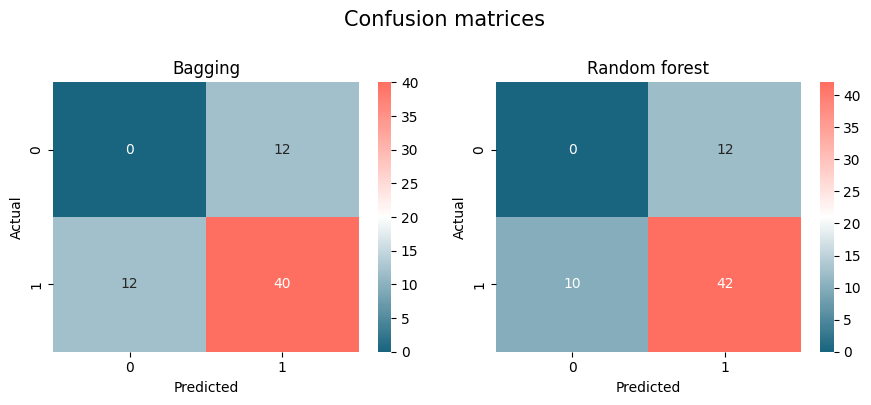

In [2148]:
#adding confusion matrices to the array and their namess
conf_matrices = [conf_matrix_bagging, conf_matrix_random_forest]
titles = ['Bagging', 'Random forest']

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

#looping and showing data
for i, ax in enumerate(axes.ravel()):
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap=custom_cmap, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.suptitle("Confusion matrices", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.3, wspace=0.6) #adjusting space between plots
plt.tight_layout()
plt.show()

In [2149]:
metrics_3 = pd.DataFrame({
    'Model': ['Bagging', 'Random forest'],
    'Accuracy': [accuracy_bagging, accuracy_random_forest],
    'Precision': [precision_bagging, precision_random_forest],
    'Recall': [recall_bagging, recall_random_forest],
    'F1-Score': [f1_bagging, f1_random_forest]
})

metrics_3.head()

,Model,Accuracy,Precision,Recall,F1-Score
0,Bagging,0.62500,0.769231,0.769231,0.769231
1,Random forest,0.65625,0.777778,0.807692,0.792453


<b> Comparison</b>

<ul>
    <li>Both models are equally easy to implement</li>
    <li>Both models resulted in relatively positive results, around 63% accuracy, with random forest performing slightly better</li>
    <li>Both models are fairly good in predicting positives, while they are very bad in predicting negatives, Bagging being slightly worse</li>
    <li>Both models are performing much worse than previous algorithms when used with greed search</li>
    <li>It is difficult to compare those 2 models to each other as in this case, they resulted in very similar results and their implementation was fairly easy</li>
</ul>